In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Study the Data

Compare relationship between features in the dataset

# Load the Data

In [3]:
# File to Load 
file_to_load = "dataset/data_cleanOutliers.csv"

# Read Purchasing File and store into Pandas data frame
housing_data = pd.read_csv(file_to_load)
housing_data.head(10)

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1
5,11000015,37980,153023.0,6,1950,4.0,3,2,3,1
6,11000016,37980,248031.0,6,1980,4.0,3,2,2,1
7,11000017,37980,287408.0,7,1950,6.0,3,4,2,1
8,11000023,37980,208364.0,7,1950,4.0,3,2,2,1
9,11000031,99998,39589.0,5,1940,3.0,2,3,2,1


In [4]:
# Check for NULL values
housing_data.isnull().sum()

CONTROL      0
OMB13CBSA    0
MARKETVAL    0
TOTROOMS     0
YRBUILT      0
UNITSIZE     0
BEDROOMS     0
BATHROOMS    0
BLD          0
outliers     0
dtype: int64

In [5]:
housing_df = housing_data.copy()

# We will study single family houses only
housing_df = housing_df.loc[housing_df['BLD'] == 2]
housing_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
0,11000001,37980,307811.0,8,2000,6.0,3,4,2,1
1,11000005,99998,229992.0,8,1970,6.0,4,5,2,1
2,11000006,99998,132220.0,5,1980,4.0,3,3,2,1
3,11000007,37980,271584.0,8,1960,7.0,4,4,2,1
4,11000013,37980,573123.0,8,1980,8.0,3,4,2,1


In [7]:
# Further narrow down to one city DFW Texas 
housing_df = housing_df.loc[housing_df['OMB13CBSA'] == 19100]
housing_df.head()

,CONTROL,OMB13CBSA,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS,BLD,outliers
3623,11014590,19100,190639.0,5,1940,4.0,2,1,2,1
3624,11014595,19100,374382.0,5,1970,4.0,3,3,2,1
3625,11014596,19100,178064.0,6,1980,5.0,3,3,2,1
3626,11014606,19100,378147.0,9,1970,9.0,4,5,2,1
3627,11014607,19100,58516.0,6,1950,5.0,3,3,2,1


In [12]:
housing_study_df = housing_df.drop(housing_df.columns[[0, 1, 8, 9]], axis=1) 
housing_study_df.head()

,MARKETVAL,TOTROOMS,YRBUILT,UNITSIZE,BEDROOMS,BATHROOMS
3623,190639.0,5,1940,4.0,2,1
3624,374382.0,5,1970,4.0,3,3
3625,178064.0,6,1980,5.0,3,3
3626,378147.0,9,1970,9.0,4,5
3627,58516.0,6,1950,5.0,3,3


c:\users\zhen\anaconda3\envs\pythondata\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


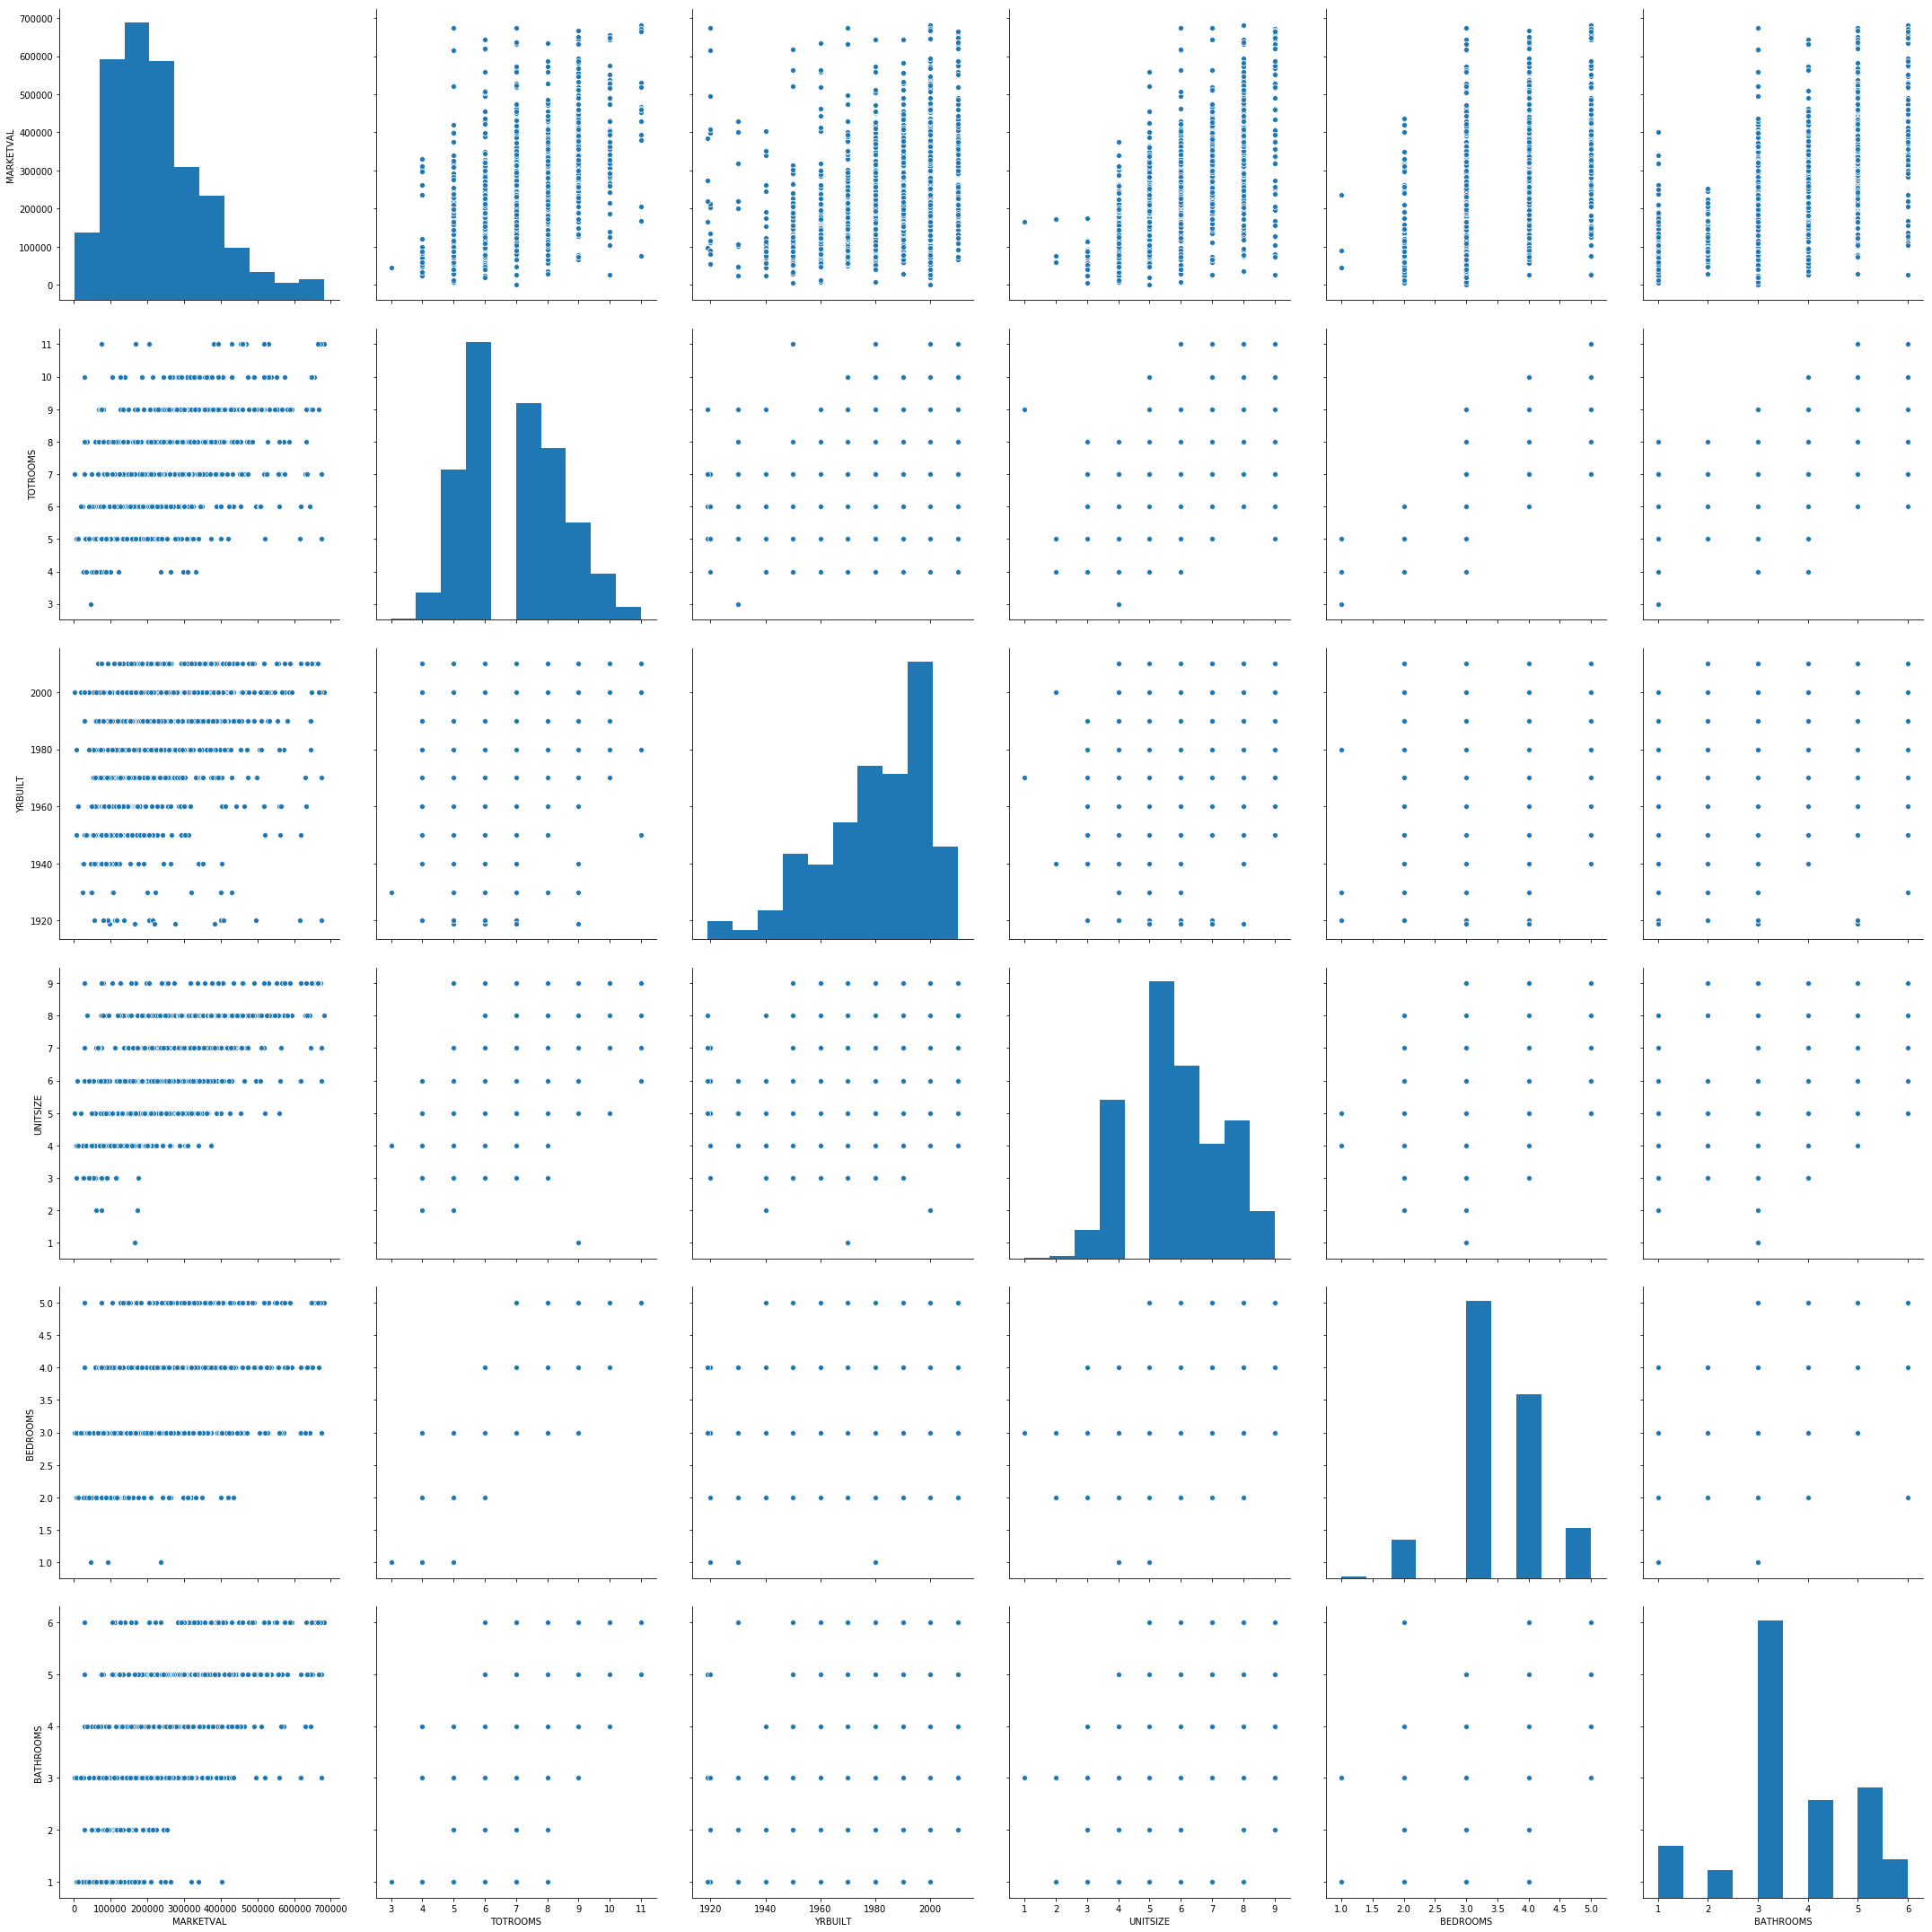

In [15]:
sns.pairplot(housing_study_df, size=5)
plt.tight_layout()

plt.savefig("output/DataAnalysis_PairPlot_city.png")

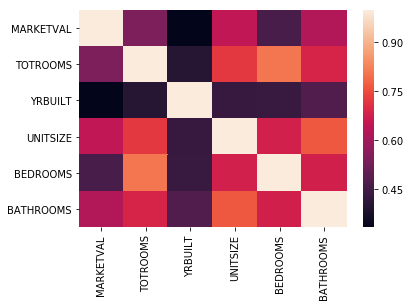

In [18]:
corr = housing_study_df.corr()
sns.heatmap(corr)

plt.savefig("output/DataAnalysis_Heatmap_city.png", bbox_inches='tight')